# Check the trihydrogen geometry creation code is working as expected

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import energy
import molecule

# Create the trihyrdrogen using the molecule module
trihydrogen = molecule.trihydrogen_cation(
    bond_length=1,
    basis=molecule.Basis.STO_3G,
)

# Check how many qubits this molecule takes
print(trihydrogen.n_qubits)

# Find FCI energies using the energy module
fci_energies = energy.fci_energy(trihydrogen)

None


Why is n_qubits set to None? It is an openfermion.MolecularData object after all!

# Optimal bond length
Create equilateral triangles of different bond lengths, find minimum of potential energy curve.

In [17]:
import numpy as np
import energy
import molecule

# The choice of basis effects the accuracy of the optimal bond length
BASIS = molecule.Basis.STO_3G
fci_energies = []
bond_lengths = np.arange(0.98, 0.99, 0.001)

# For each bond length create an equilateral triangle trihydrogen cation
for bond_length in bond_lengths:
    mol = molecule.trihydrogen_cation(bond_length=bond_length, basis=BASIS)
    fci_energies.append(energy.fci_energy(mol))

# List of ground state FCI energies for each bond length
ground_state = list(zip(*fci_energies))[0]
min_index = np.argmin(ground_state) # index of lowest energy
min_bond_length = bond_lengths[min_index] # min energy bond length
min_bond_length

0.986

The optimal bond length depends on the choice of basis. For a more accurate CC-PDVZ basis it is 0.901 A (which agrees with literature), for STO-3G it is 0.986 A.

# Use FCI to find conical intersection
Using STO-3G with 0.986 A as the bond length for the minimum.

In [19]:
import molecule

def trihydrogen_x_sweep(x):
    """
    H3+ molecule for x-axis sweep of third hydrogen.
    The equilateral triangle is at x = 0.
    By symmetry the positive and negative x positions are equivalent.
    """
    geometry = [
    ('H', (-0.5, 0, 0)),
    ('H', (0.5, 0, 0)),
    ('H', (x, np.sqrt(3)/2, 0)) # position third H atom at x
    ]
    return molecule.create_molecule(geometry, charge=1, multiplicity=1)

In [20]:
trihydrogen_list = []
x_coords = np.linspace(-0.5, 0.5, 21)
for x in x_coords:
    trihydrogen = trihydrogen_x_sweep(x)
    trihydrogen_list.append(trihydrogen)

fci_energies = []
for mol in trihydrogen_list:
    # 27.2114 converts Ha to eV
    fci_energies.append(energy.fci_energy(mol) * 27.2114)

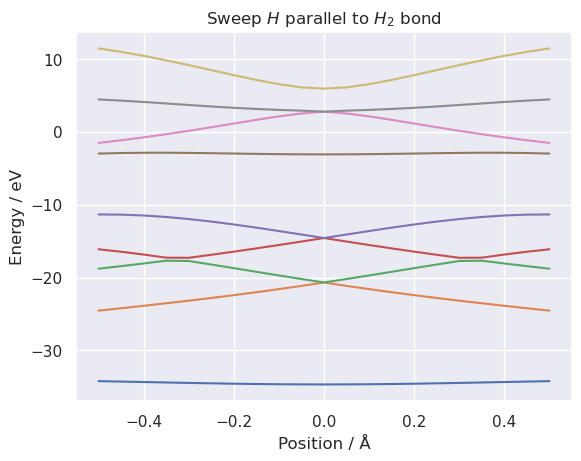

In [22]:
# Uncomment for interactive or inline plots
# %matplotlib widget
%matplotlib inline
import seaborn as sns
sns.set_theme()

plt.plot(x_coords, fci_energies)
plt.title(r"Sweep $H$ parallel to $H_2$ bond")
plt.xlabel("Position / Å")
plt.ylabel("Energy / eV")
plt.show()

In [23]:
plt.savefig("trihydrogen_cation_x_sweep.svg")
plt.savefig("trihydrogen_cation_x_sweep.png", transparent=True)

<Figure size 640x480 with 0 Axes>

# Repeat for multiplicity 3 to see if there are any triplet states

In [78]:
import numpy as np
from matplotlib import pyplot as plt

import energy
import molecule

In [79]:
def trihydrogen_cation_x_sweep_triplet(x):
    """H3+ molecule for x-axis sweep of third hydrogen."""
    geometry = [
    ('H', (0, 0, 0)),
    ('H', (1, 0, 0)),
    ('H', (x, np.sqrt(3)/2, 0))
    ]
    return molecule.create_molecule(geometry, charge=1, multiplicity=3)

triplet_list = []
x_coords = np.linspace(0, 1, 21)
for x in x_coords:
    triplet = trihydrogen_cation_x_sweep_triplet(x)
    triplet_list.append(triplet)

In [80]:
fci_triplet_energies = []
for mol in triplet_list:
    # 27.2114 converts Ha to eV
    fci_triplet_energies.append(energy.fci_energy(mol) * 27.2114)

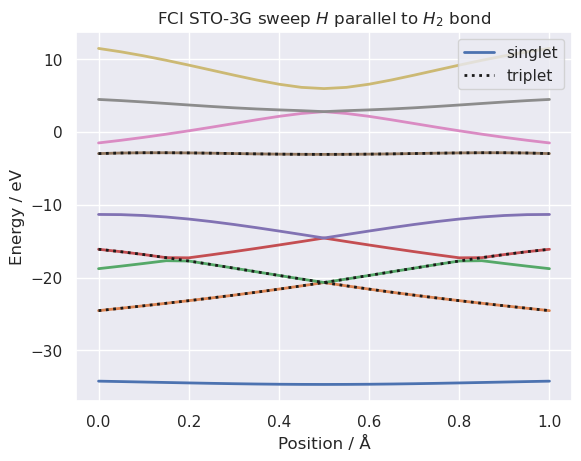

In [81]:
%matplotlib inline

# Plotting values to np arrays for slicing
fci_energies = np.array(fci_energies)
fci_triplet_energies = np.array(fci_triplet_energies)

plt.plot(x_coords, fci_energies[:,0], linewidth=2, label="singlet") # For single legend label
plt.plot(x_coords, fci_energies[:,1:], linewidth=2)
plt.plot(x_coords, fci_triplet_energies[:,0], 'k:', linewidth=2, label="triplet")
plt.plot(x_coords, fci_triplet_energies[:,1:], 'k:', linewidth=2)

plt.title(r"FCI STO-3G sweep $H$ parallel to $H_2$ bond")
plt.xlabel("Position / Å")
plt.ylabel("Energy / eV")
plt.legend()

plt.savefig("trihydrogen/trihydrogen_cation_x_sweep.svg")
plt.savefig("trihydrogen/trihydrogen_cation_x_sweep.png")

plt.show()

In [82]:
mol = trihydrogen_list[0]
geometry = [coords for atom, coords in mol.geometry]
geometry

[(0, 0, 0), (1, 0, 0), (0.0, 0.8660254037844386, 0)]

In [83]:
points2d = [[coords[:2] for atom, coords in mol.geometry] for mol in trihydrogen_list]

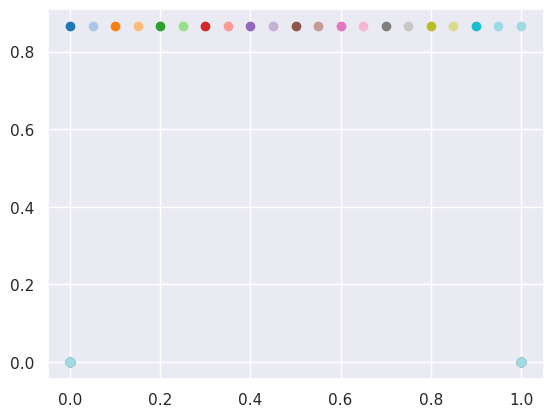

In [84]:
colors = plt.cm.tab20
fig = plt.figure()
for i, triangle in enumerate(points2d):
    color = colors(i)
    for point in triangle:
        plt.scatter(*point, color=color)
plt.show()